experiment 32/32[[0.93589744 0.99047619 1.         1.        ]
 [0.6722807  0.96843678 0.97484848 1.        ]
 [0.72744755 0.97250149 0.97142857 0.99459459]
 [0.57933333 0.85278904 0.9850172  0.99473684]
 [0.5535     0.86433841 0.9180242  0.9445843 ]
 [0.503875   0.61861231 0.69503882 0.83591053]
 [0.505      0.4871875  0.4990625  0.56084722]
 [0.493      0.495875   0.50490625 0.49725   ]]


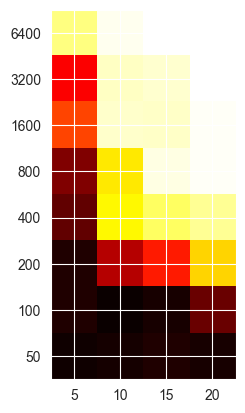

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from ema_workbench.analysis import prim

def generate_points(n, m):
    # Generate n x m matrix of random points in [0, 1]
    x = np.random.rand(n, m)
    
    # Generate a vector of n random labels (0 or 1)
    y = np.random.choice([0, 1], n, replace=True)
    
    # Return as a dictionary
    return x, y

pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 20]  # number of dimensions to experiment with
res = np.empty((len(pts), len(atrs)))  # matrix with the results
res[:] = np.nan
k = 1

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec1 = []
        for i in range(5):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)*len(atrs)))
            x, y = generate_points(pts[n], atrs[m])
            prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
            box1 = prim_alg.find_box()
            prec1.append(box1.density)
        res[n, m] = np.mean(prec1)
        k = k + 1

print(res)

pts.reverse()
plt.imshow(res, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.show()